In [1]:
import lib 
from NeuralStates import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

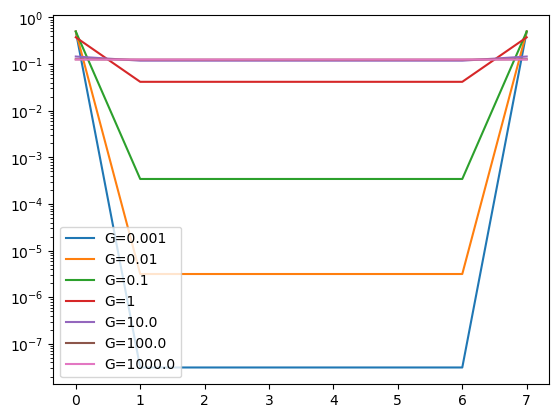

In [2]:
N = 3
J = 1
gammas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
states = [n for n in range(0, 2 ** N)]
for Gamma in gammas:
    h = lib.TFIM_hamiltonian(N, J, Gamma)
    gs = h.eigenstates()[1][0]
    distr = np.abs(np.squeeze(gs.full())) ** 2
    plt.plot(states, distr, label = f'G={Gamma}')
plt.legend(loc = 'best')
plt.yscale('log')
plt.show()

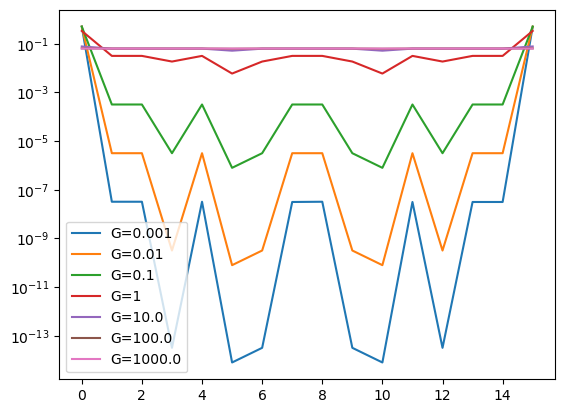

In [3]:
N = 4
J = 1
gammas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
states = [n for n in range(0, 2 ** N)]
for Gamma in gammas:
    h = lib.TFIM_hamiltonian(N, J, Gamma)
    gs = h.eigenstates()[1][0]
    distr = np.abs(np.squeeze(gs.full())) ** 2
    plt.plot(states, distr, label = f'G={Gamma}')
plt.legend(loc = 'best')
plt.yscale('log')
plt.show()

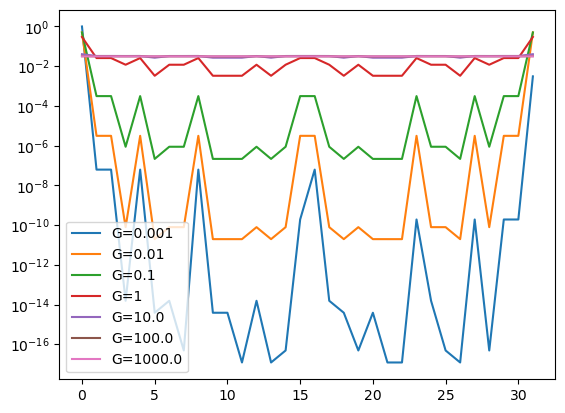

In [4]:
N = 5
J = 1
gammas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
states = [n for n in range(0, 2 ** N)]
for Gamma in gammas:
    h = lib.TFIM_hamiltonian(N, J, Gamma)
    gs = h.eigenstates()[1][0]
    distr = np.abs(np.squeeze(gs.full())) ** 2
    plt.plot(states, distr, label = f'G={Gamma}')
plt.legend(loc = 'best')
plt.yscale('log')
plt.show()

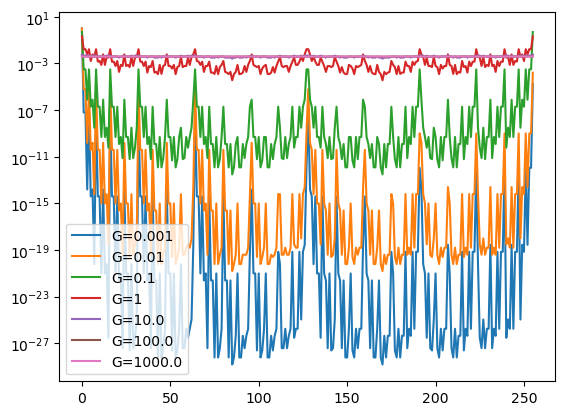

In [5]:
N = 8
J = 1
gammas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
states = [n for n in range(0, 2 ** N)]
for Gamma in gammas:
    h = lib.TFIM_hamiltonian(N, J, Gamma)
    gs = h.eigenstates()[1][0]
    distr = np.abs(np.squeeze(gs.full())) ** 2
    plt.plot(states, distr, label = f'G={Gamma}')
plt.legend(loc = 'best')
plt.yscale('log')
plt.show()

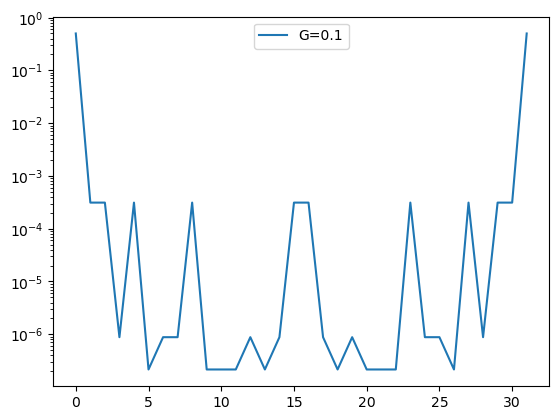

In [6]:
N = 5
J = 1
Gamma = 0.1
h = lib.TFIM_hamiltonian(N, J, Gamma)
gs = h.eigenstates()[1][0]
gs = np.squeeze(gs.full())
states = [n for n in range(2 ** N)]
distr = np.abs(gs) ** 2
plt.plot(states, distr, label = f'G={Gamma}')
plt.legend(loc = 'best')
plt.yscale('log')
plt.show()

In [7]:
def calc_bitdist(a, b, N):
    diffs = a ^ b
    return sum((diffs >> i) & 1 for i in range(N))

In [8]:
calc_bitdist(0, 2 ** N - 1, N)

5

In [9]:
diffs = []
vec_diffs = []
prob_diffs = []
for i in range(0, 2 ** N):
    for j in range(i + 1, 2 ** N):
        diffs.append(calc_bitdist(i, j, N))
        vec_diffs.append(abs(gs[i] - gs[j]))
        prob_diffs.append(abs(distr[i] - distr[j]))

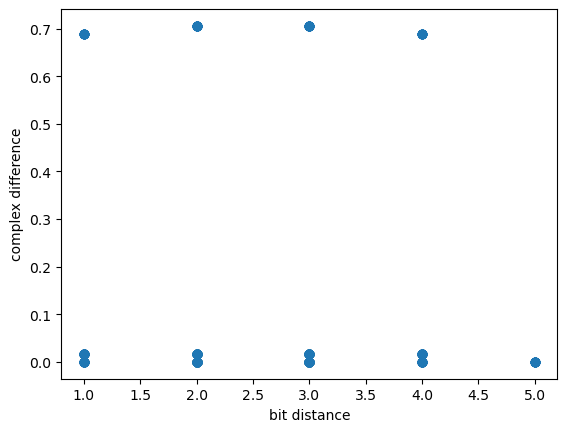

In [10]:
plt.scatter(diffs, vec_diffs)
plt.xlabel('bit distance')
plt.ylabel('complex difference')
plt.show()

In [11]:
res = stats.linregress(diffs, vec_diffs)
print(res.rvalue)

-0.03144803972814214


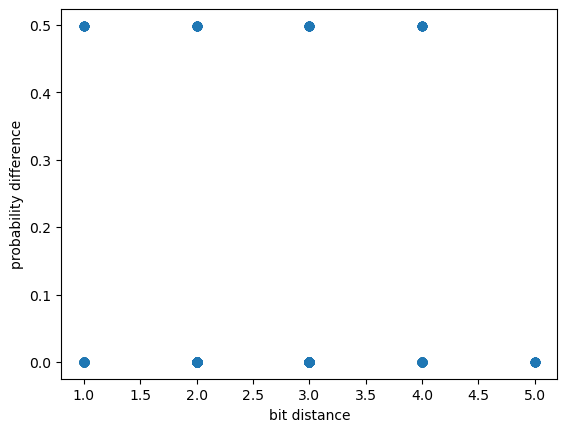

In [12]:
plt.scatter(diffs, prob_diffs)
plt.xlabel('bit distance')
plt.ylabel('probability difference')
plt.show()

In [13]:
res = stats.linregress(diffs, prob_diffs)
print(res.rvalue)

-0.028826049710284612


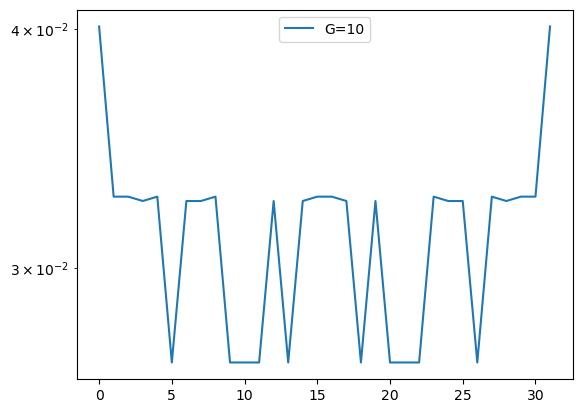

In [14]:
N = 5
J = 1
Gamma = 10
h = lib.TFIM_hamiltonian(N, J, Gamma)
gs = h.eigenstates()[1][0]
gs = np.squeeze(gs.full())
states = [n for n in range(2 ** N)]
distr = np.abs(gs) ** 2
plt.plot(states, distr, label = f'G={Gamma}')
plt.legend(loc = 'best')
plt.yscale('log')
plt.show()

In [15]:
diffs = []
vec_diffs = []
prob_diffs = []
for i in range(0, 2 ** N):
    for j in range(i + 1, 2 ** N):
        diffs.append(calc_bitdist(i, j, N))
        vec_diffs.append(abs(gs[i] - gs[j]))
        prob_diffs.append(abs(distr[i] - distr[j]))

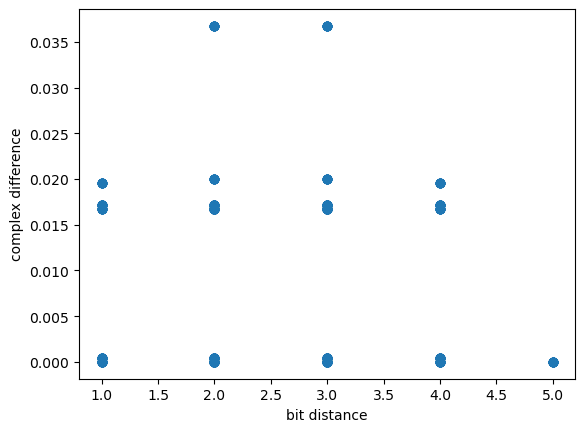

In [16]:
plt.scatter(diffs, vec_diffs)
plt.xlabel('bit distance')
plt.ylabel('complex difference')
plt.show()

In [17]:
res = stats.linregress(diffs, vec_diffs)
print(res.rvalue)

-0.07691784844485236


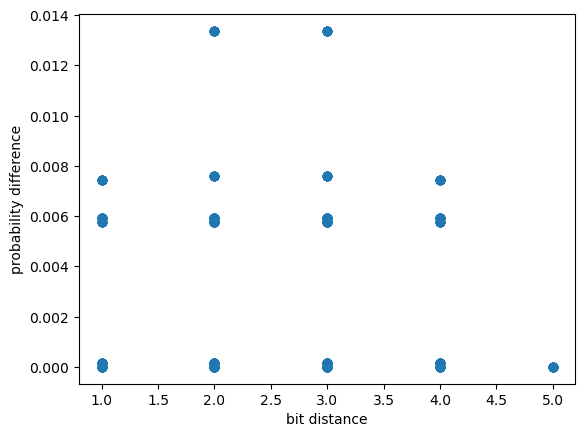

In [18]:
plt.scatter(diffs, prob_diffs)
plt.xlabel('bit distance')
plt.ylabel('probability difference')
plt.show()

In [19]:
res = stats.linregress(diffs, prob_diffs)
print(res.rvalue)

-0.07589923981179475


In [31]:
ns = [n for n in range(2, 13)]
gses = []
for n in ns:
    h = lib.TFIM_hamiltonian(n, 1, 1)
    gses.append(h.eigenstates()[0][0])

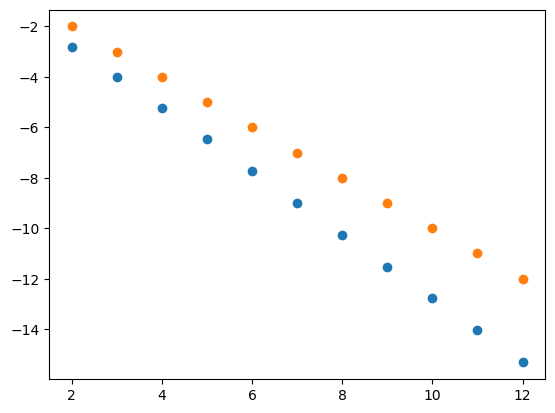

In [32]:
plt.scatter(ns, gses, label = 'actual')
plt.scatter(ns, -1 * np.array(ns), label = 'y=x')
plt.show()

In [33]:
res = stats.linregress(ns, gses)
print(res)
print(res.rvalue ** 2)

LinregressResult(slope=np.float64(-1.2543205686549224), intercept=np.float64(-0.23540989963659698), rvalue=np.float64(-0.999962317658581), pvalue=np.float64(7.244552229471325e-20), stderr=np.float64(0.003629806728748019), intercept_stderr=np.float64(0.02788107452010771))
0.9999246367371208


In [35]:
print(10 ** 0.5, 10 ** -0.5)

3.1622776601683795 0.31622776601683794


In [36]:
ns = [n for n in range(2, 11)]
gses_large = []
for n in ns:
    h = lib.TFIM_hamiltonian(n, 1, 3.16)
    gses_large.append(h.eigenstates()[0][0])

In [37]:
res = stats.linregress(ns, gses_large)
print(res)
print(res.rvalue ** 2)

LinregressResult(slope=np.float64(-3.2274909713051994), intercept=np.float64(-0.09488156342746024), rvalue=np.float64(-0.9999915452521397), pvalue=np.float64(5.78609803784559e-18), stderr=np.float64(0.0050163068887105824), intercept_stderr=np.float64(0.032766379388131116))
0.9999830905757622


In [41]:
ns = [n for n in range(2, 11)]
gses_small = []
for n in ns:
    h = lib.TFIM_hamiltonian(n, 1, 0.316)
    gses_small.append(h.eigenstates()[0][0])

In [42]:
res = stats.linregress(ns, gses_small)
print(res)
print(res.rvalue ** 2)

LinregressResult(slope=np.float64(-1.02129651713657), intercept=np.float64(-0.029933726574262742), rvalue=np.float64(-0.999991585927859), pvalue=np.float64(5.6892537294669476e-18), stderr=np.float64(0.0015835204815038918), intercept_stderr=np.float64(0.010343512471815633))
0.9999831719265145


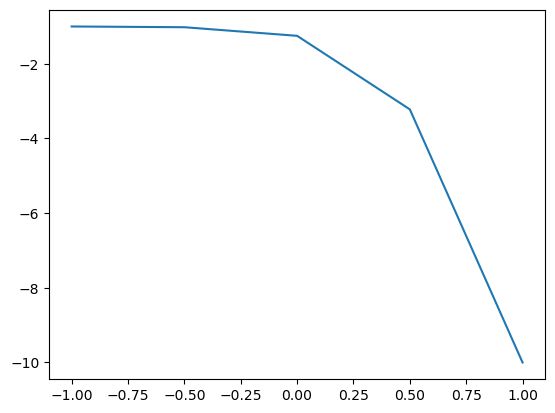

In [ ]:
plt.plot([-1, -0.5, 0, 0.5, 1], [-1, -1.02, -1.25, -3.22, -10]) 
# Gamma = 10^-x, y=slope of scaling wrt n for said Gamma 
plt.show()

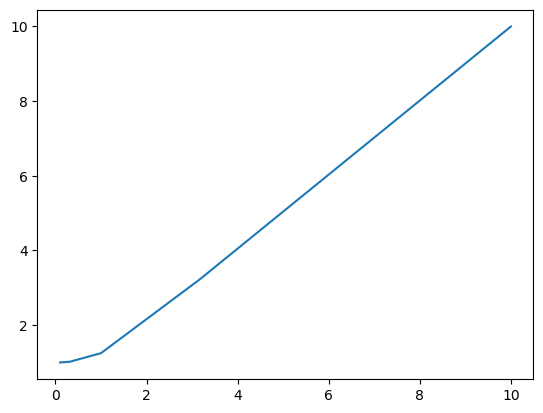

In [50]:
x = np.array([-1, -0.5, 0, 0.5, 1])
y = np.array([-1, -1.02, -1.25, -3.22, -10])
plt.plot(10** x, (-1 * y)) 
# Gamma = 10^-x, y=slope of scaling wrt n for said Gamma 
plt.show()

In [51]:
res = stats.linregress(10 ** x, -y)
res

LinregressResult(slope=np.float64(0.9296207201238365), intercept=np.float64(0.5875038574760887), rvalue=np.float64(0.997474835323444), pvalue=np.float64(0.00015226631856866393), stderr=np.float64(0.03821454832686832), intercept_stderr=np.float64(0.1801442076849369))